<div class="alert alert-block alert-success">
<h1 style='text-align: center'>ANDREAN YONATHAN</h1>
<h2 style='text-align: center'>EXPLORATORY DATA ANALYSIS</h2>
</div>

<div class="alert alert-block alert-info">
<h2>Contents: </h2>
    <ol>
    <li>Import Library</li>
    <li>Load Dataset</li>
    <li>Exploratory Data Analysis</li>
    </ol>
</div>

# Import Library

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)

# Load Dataset

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

source = https://www.kaggle.com/datasets/toramky/automobile-dataset

In [2]:
df = pd.read_csv('automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Exploratory Data Analysis

## Check data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## Descriptive Statistics

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


## Check Missing Values

In [5]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

There are 4 missing values in `stroke` column and 1 missing value in `horsepower-binned` and will be dropped.

In [6]:
df.dropna(inplace = True)
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

## Check Outliers

In [7]:
numeric = [col for col in df.columns if df[col].dtype != 'object']

for col in numeric:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = iqr - q1*1.5
    upper = iqr + q3*1.5
    outlier = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f'Outlier in column {col}: {outlier}')

Outlier in column symboling: 141
Outlier in column normalized-losses: 1
Outlier in column wheel-base: 0
Outlier in column length: 0
Outlier in column width: 0
Outlier in column height: 0
Outlier in column curb-weight: 0
Outlier in column engine-size: 4
Outlier in column bore: 0
Outlier in column stroke: 0
Outlier in column compression-ratio: 20
Outlier in column horsepower: 0
Outlier in column peak-rpm: 0
Outlier in column city-mpg: 0
Outlier in column highway-mpg: 0
Outlier in column price: 9
Outlier in column city-L/100km: 0
Outlier in column diesel: 20
Outlier in column gas: 0


### outlier visualization

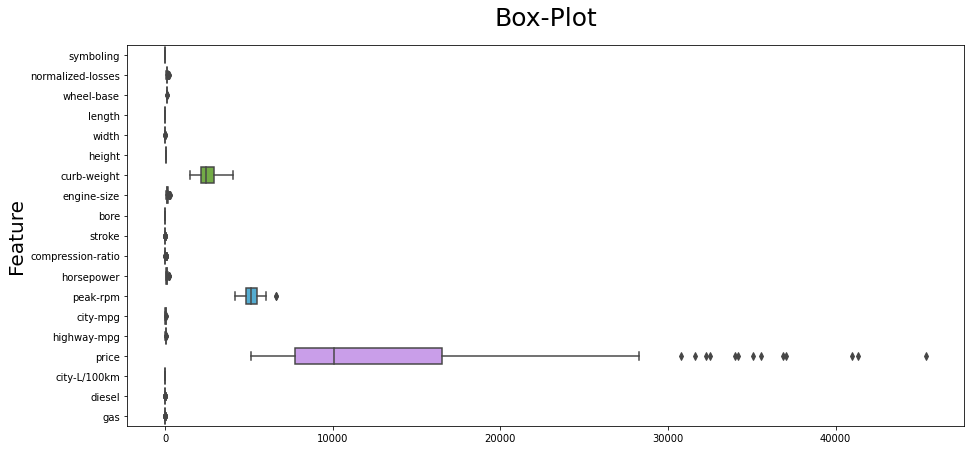

In [8]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df[numeric], orient = 'h')
plt.title('Box-Plot', fontsize = 25, pad = 20)
plt.ylabel('Feature', fontsize = 20)
plt.show()

From the figure above, some features have outliers.

## Number of car based on body-style, drive-wheels, and engine-location

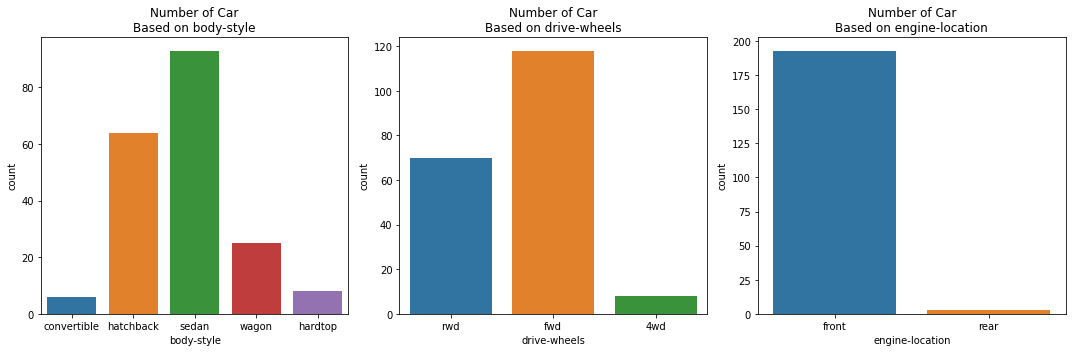

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

for i, col in enumerate(['body-style', 'drive-wheels', 'engine-location']):
    sns.countplot(x = col, data = df, ax = ax[i])
    ax[i].set_title(f'Number of Car\nBased on {col}')
plt.tight_layout()
plt.show()

* The majority of cars have `hatchback` and `sedan` body style.
* The `4wd` drive-wheels have smallest number compare to `fwd` and `rwd`.
* Almost all the cars have `front` engine-location.

## Number of car based on engine-type, num-of-cylinder, and fuel-system

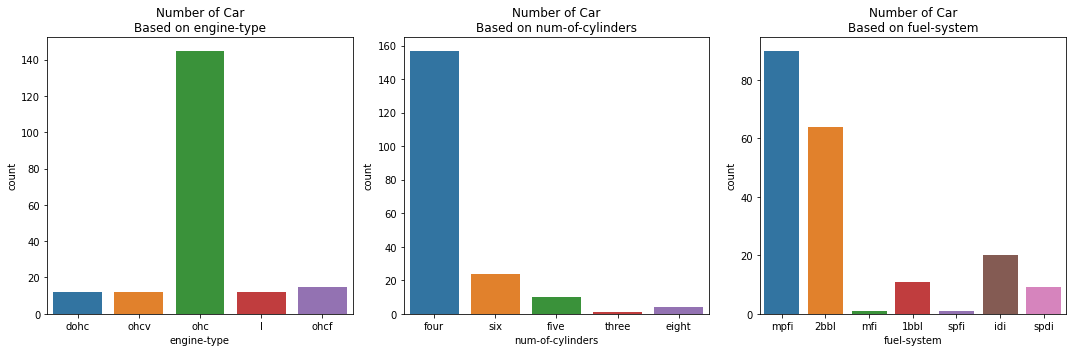

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

for i, col in enumerate(['engine-type', 'num-of-cylinders', 'fuel-system']):
    sns.countplot(x = col, data = df, ax = ax[i])
    ax[i].set_title(f'Number of Car\nBased on {col}')
plt.tight_layout()
plt.show()

From the figures above, the information obtained are:
* Car with `ohc` engine-type is the most among the others.
* The majority of the car have `four` cylinders and car with `three` and `eight` cylinders have the smallest number.
* `mpfi` and `2bbl` are two types of the fuel system that are widely used in cars.

## Number of car based on insurance risky rating

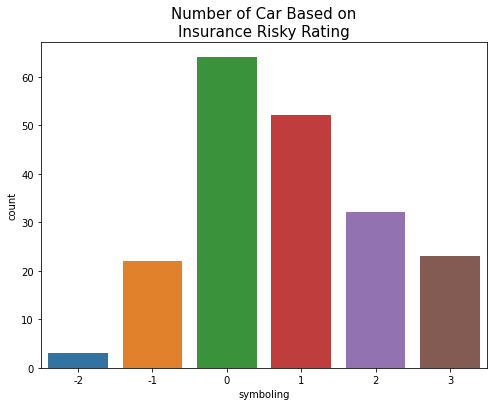

In [11]:
plt.figure(figsize = (8,6))
sns.countplot(x='symboling', data = df)
plt.title('Number of Car Based on\nInsurance Risky Rating', fontsize = 15)
plt.show()

Most cars are included in `risk` category according to the figure above.

## Distribution width, height, curb-weight, bore, stroke, price

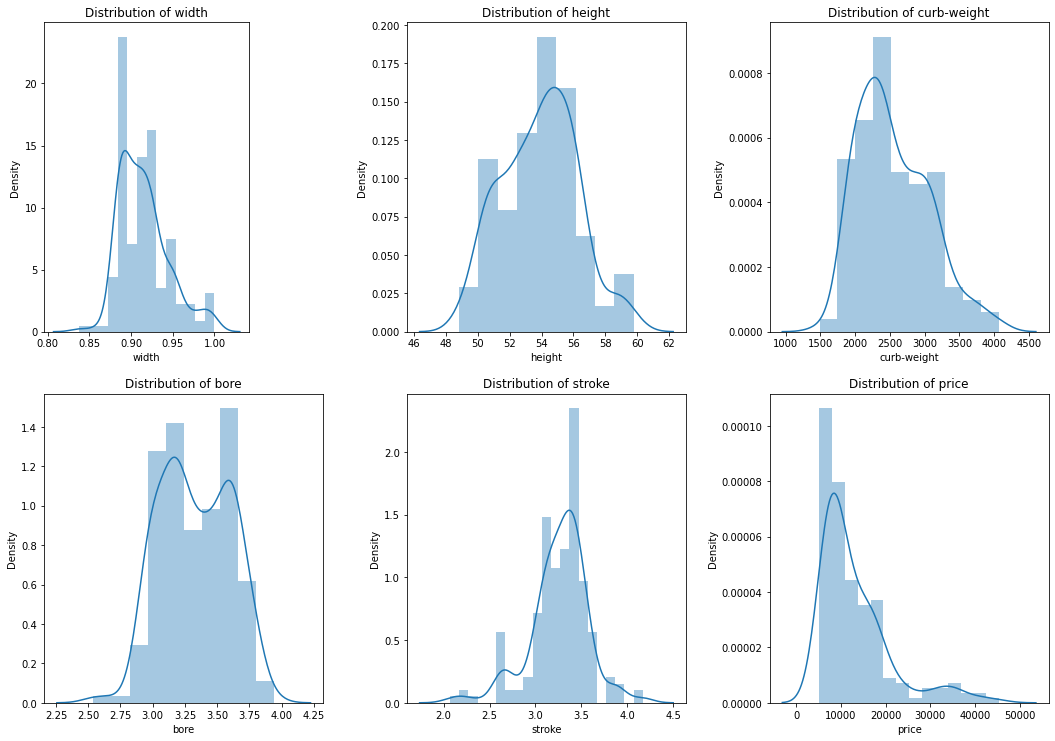

In [12]:
plt.figure(figsize = (18,6))
plt.subplot(2,4,1)
ax = sns.distplot(df['width'])
ax.set_title('Distribution of width')

plt.subplot(2,3,2)
ax = sns.distplot(df['height'])
ax.set_title('Distribution of height')

plt.subplot(2,3,3)
ax = sns.distplot(df['curb-weight'])
ax.set_title('Distribution of curb-weight')

plt.subplot(2,3,4)
ax = sns.distplot(df['bore'])
ax.set_title('Distribution of bore')

plt.subplot(2,3,5)
ax = sns.distplot(df['stroke'])
ax.set_title('Distribution of stroke')

plt.subplot(2,3,6)
ax = sns.distplot(df['price'])
ax.set_title('Distribution of price')
plt.subplots_adjust(top = 1.7, wspace=0.3)
plt.tight_layout()
plt.show()

The figures above show the distribution of some numeric variables. The `price` variable is look have the skewness.

## Number of car in risk ratting based on make feature

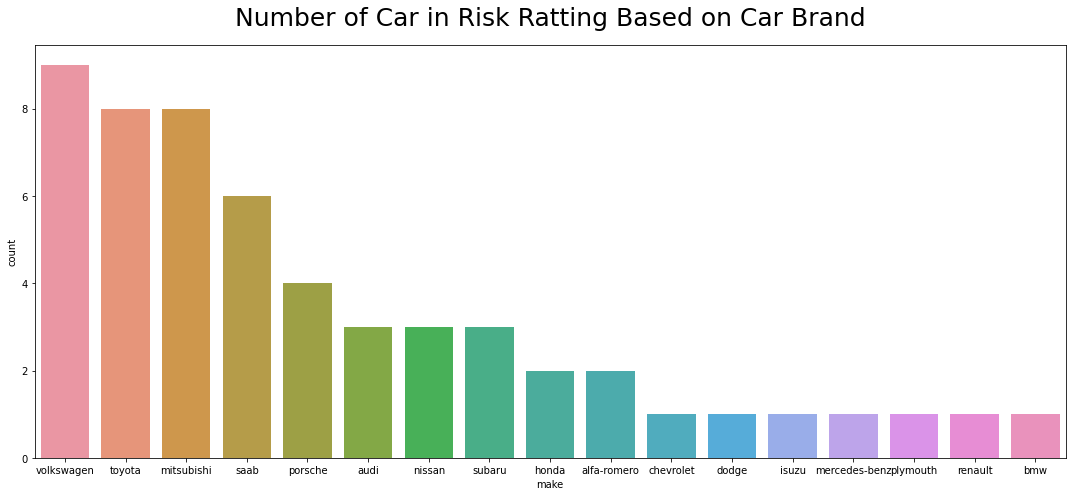

In [13]:
df_risk = df[(df['symboling'] == 2) | (df['symboling'] == 3)]

plt.figure(figsize = (15,7))
sns.countplot(x = 'make', data = df_risk, order = df_risk['make'].value_counts().index)
plt.title('Number of Car in Risk Ratting Based on Car Brand', fontsize = 25, pad = 20)
plt.tight_layout()
plt.show()

The figure above show that `volkswagen`, `toyota`, and `mitsubishi` are three brands that have high insurance risks.

## Correlation

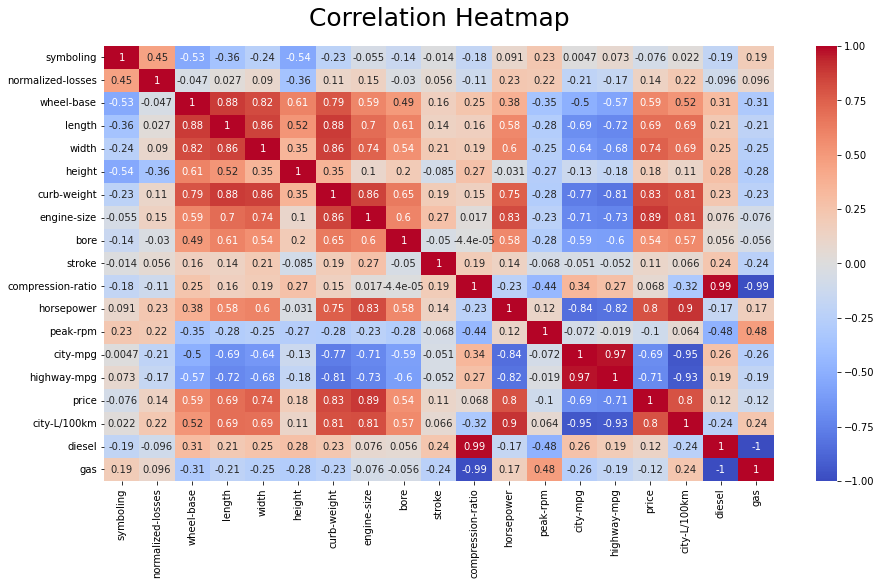

In [14]:
plt.figure(figsize = (15,8))
sns.heatmap(df[numeric].corr(), annot = True, cmap= 'coolwarm', mask = False, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 25, pad = 20)
plt.show()